<a href="https://colab.research.google.com/github/powersurge8891/Data-mining-with-Python/blob/main/Survival_Analysis_with_Kaplan_Meier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Changing directory

In [ ]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis

/content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis


Importing data and libraries

In [ ]:
import pandas as pd
!pip install lifelines


Description
In 1988 an experiment was designed and implemented at one of AT&T's factories to investigate alternatives in the "wave soldering" procedure for mounting electronic
componentes to printed circuit boards. The experiment varied a number of factors relevant to the process. The response, measured by eye, is the number of visible solder skips.

Usage
data("solder")


Format
A data frame with 900 observations on the following 6 variables.

Opening
the amount of clearance around the mounting pad (3 levels)

Solder
the amount of solder (Thick or Thin)

Mask
type and thickness of the material used for the solder mask (A1.5, A3, A6, B3, B6)

PadType
the geometry and size of the mounting pad (10 levels)

Panel
each board was divided into 3 panels

skips
the number of skips

Details
This data set is used as a detailed example in chapter 1 of Chambers and Hastie. Observations 1-360 and 541-900 form a balanced design of 3*2*10*3= 180 observations
for four of the pad types (A1.5, A3, B3, B6), while rows 361-540 match 3 of the 6 Solder*Opening combinations with pad type A6 and the other 3 with pad type A3.

References
J Chambers and T Hastie, Statistical models in S. Chapman and Hall, 1993.

Examples
data(solder)
 The balanced subset used by Chambers and Hastie
 contains the first 180 of each mask and deletes mask A6.
index <- 1 + (1:nrow(solder)) - match(solder$Mask, solder$Mask)
solder.balance <- droplevels(subset(solder, Mask != "A6"



In [ ]:
data=pd.read_csv('solder.csv')
data.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0


In [ ]:
#DATA WRANGLING
data.isna().sum()

Opening    0
Solder     0
Mask       0
PadType    0
Panel      0
skips      0
dtype: int64

In [ ]:
data.Solder.value_counts()

Thick    450
Thin     450
Name: Solder, dtype: int64

In [ ]:

data['new_solder']=pd.get_dummies(data.Solder, drop_first=True)

In [ ]:
data.sample(4) #0= thick and 1 =thin

,Opening,Solder,Mask,PadType,Panel,skips,new_solder
868,M,Thin,B6,L9,2,8,1
636,L,Thin,B3,L4,1,3,1
798,S,Thick,B6,L7,1,13,0
626,S,Thick,B3,W9,3,1,0


In [ ]:
data.Mask.value_counts()

A3      270
B6      180
B3      180
A1.5    180
A6       90
Name: Mask, dtype: int64

In [ ]:
data.Opening.value_counts()

S    300
M    300
L    300
Name: Opening, dtype: int64

In [ ]:
data.PadType.value_counts()

L7    90
L8    90
W4    90
D7    90
W9    90
L9    90
D4    90
L6    90
L4    90
D6    90
Name: PadType, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [ ]:
data['new_mask']=lab_enc.fit_transform(data.Mask)

In [ ]:
data.sample(3)

,Opening,Solder,Mask,PadType,Panel,skips,new_solder,new_mask
840,M,Thin,B6,W4,1,5,1,4
42,M,Thick,A1.5,L6,1,0,0,0
624,S,Thick,B3,W9,1,2,0,3


In [ ]:
data['new_opening']=lab_enc.fit_transform(data.Opening)
data.sample(3)

,Opening,Solder,Mask,PadType,Panel,skips,new_solder,new_mask,new_opening
454,L,Thin,A3,D4,2,7,1,1,0
281,L,Thin,A3,D6,3,2,1,1,0
244,S,Thick,A3,D4,2,1,0,1,2


In [ ]:
data['new_padtype']=lab_enc.fit_transform(data.PadType)
data.sample(3)

,Opening,Solder,Mask,PadType,Panel,skips,new_solder,new_mask,new_opening,new_padtype
272,L,Thin,A3,W4,3,2,1,1,0,8
849,M,Thin,B6,D6,1,3,1,4,1,1
838,L,Thin,B6,L9,2,8,1,4,0,7


In [ ]:
new_data= data.drop(columns=['Opening', 'Solder', 'Mask','PadType'])
new_data.sample(3)

,Panel,skips,new_solder,new_mask,new_opening,new_padtype
689,3,4,1,3,1,7
161,3,6,1,0,2,1
247,2,3,0,1,2,3


In [ ]:
#main focus is solder and panel
new_data.Panel.value_counts()

3    300
2    300
1    300
Name: Panel, dtype: int64

In [ ]:
new_data.new_solder.value_counts()

1    450
0    450
Name: new_solder, dtype: int64

Kaplan Meier

In [ ]:
from lifelines import KaplanMeierFitter
model=KaplanMeierFitter()

In [ ]:
model.fit(durations=new_data.skips, event_observed=new_data.new_solder)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 900 total observations, 450 right-censored observations>

In [ ]:
model.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,285,82,203,900,900
1,123,54,69,0,615
2,90,43,47,0,492
3,45,29,16,0,402
4,42,28,14,0,357


In [ ]:
event_1= model.event_table.iloc[1, :]
event_1

removed     123
observed     54
censored     69
entrance      0
at_risk     615
Name: 1, dtype: int64

In [ ]:
surv_1=1 *(1-event_1.observed/event_1.at_risk)
surv_1

0.9121951219512195

Visualizing

In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Probability of survival')

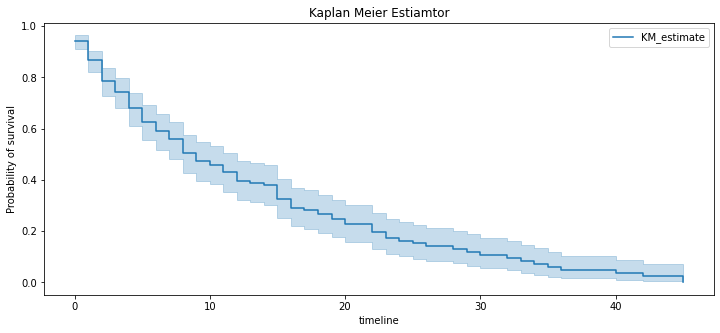

In [ ]:
model.plot(figsize = (12,5))
plt.title("Kaplan Meier Estiamtor")
plt.ylabel('Probability of survival')

In [ ]:



first_panel=new_data.query('Panel==1')
sec_panel=new_data.query('Panel==2')
th_panel=new_data.query('Panel==3')

In [ ]:
first=KaplanMeierFitter()
sec=KaplanMeierFitter()
th=KaplanMeierFitter()

first.fit(durations=first_panel.skips, event_observed=first_panel.new_solder)
sec.fit(durations=sec_panel.skips, event_observed=sec_panel.new_solder)
th.fit(durations=th_panel.skips, event_observed=th_panel.new_solder)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 300 total observations, 150 right-censored observations>

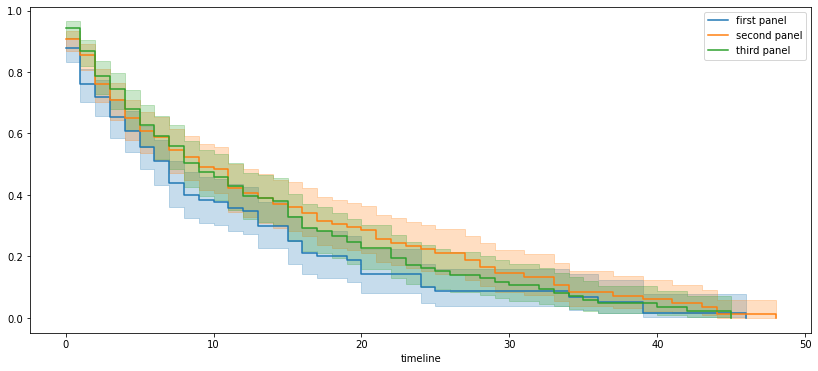

In [ ]:
first.plot(figsize=(14,6), label= "first panel")
sec.plot(label= 'second panel')
th.plot(label='third panel')

#Log rank test

In [ ]:
from lifelines.statistics import multivariate_logrank_test
multivariate_logrank_test(new_data.skips,new_data.Panel,new_data.new_solder)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93